### This task is focused on scraping and collecting customer feedback and reviewing data from a third-party source and analysing this data to present any insights uncovered.

##### The first thing to do will be to scrape review data from the web. For this, you should use a website called Skytrax.

##### Data Preparation

#####  Data cleaning in order to prepare the data for analysis. 

##### Data analysis is used to uncover some insights. 

##### Sentiment analysis to provide some insight into the content of the reviews.

##### Visualization of analyzed sentiments to understand the perception of customers about British Airways.

# Web scraping and analysis


## Import required libraries 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
## Scraping reviews for British Airways

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
## Placing extracted data into a dataframe

df = pd.DataFrame(np.array(reviews), columns=['reviews'])

In [4]:
df.head(10)

,reviews
0,✅ Trip Verified | I am in Australia and on Fr...
1,✅ Trip Verified | At 7.54 am on the day of tr...
2,✅ Trip Verified | Would happily fly them agai...
3,"Not Verified | Flew premium, only worth the e..."
4,✅ Trip Verified | First our morning flight wa...
5,✅ Trip Verified | Although it was a bit uncom...
6,✅ Trip Verified | Boarding was decently organ...
7,✅ Trip Verified | Boarding on time and departu...
8,✅ Trip Verified | My original flight was canc...
9,✅ Trip Verified | Delayed just for a change. ...


## Data Cleaning to remove unwanted columns

In [5]:
# Data cleaning to ensure the column is concise for analysis

df["reviews"] = df["reviews"].replace("Trip Verified |", "", regex=True)
df["reviews"] = df["reviews"].replace("Not Verified |", "", regex=True)
df["reviews"] = df["reviews"].replace("\u2705","", regex=True)
df['reviews'] = df['reviews'].str.replace('[|]', '', regex= True)
df

,reviews
0,"I am in Australia and on Friday night, went..."
1,At 7.54 am on the day of travel whilst driv...
2,Would happily fly them again. I had a perso...
3,"Flew premium, only worth the extra money for..."
4,First our morning flight was cancelled and ...
...,...
3481,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3482,LHR to HAM. Purser addresses all club passenge...
3483,My son who had worked for British Airways urge...
3484,London City-New York JFK via Shannon on A318 b...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3486 entries, 0 to 3485
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3486 non-null   object
dtypes: object(1)
memory usage: 27.4+ KB


# Analyzing the data

In [7]:
# Extracting crucial metrics from the scrapped data
# First = the wordcount of each review
# creating a new column known as "wordcount"

df["word_count"] = df['reviews'].apply(lambda x: len(x.split()))
df

,reviews,word_count
0,"I am in Australia and on Friday night, went...",149
1,At 7.54 am on the day of travel whilst driv...,151
2,Would happily fly them again. I had a perso...,55
3,"Flew premium, only worth the extra money for...",118
4,First our morning flight was cancelled and ...,129
...,...,...
3481,LHR-JFK-LAX-LHR. Check in was ok apart from be...,241
3482,LHR to HAM. Purser addresses all club passenge...,25
3483,My son who had worked for British Airways urge...,230
3484,London City-New York JFK via Shannon on A318 b...,33


In [8]:
# Secondly = Character count of eacch review

df["character_count"] = df['reviews'].apply(lambda x: len(x))
df

,reviews,word_count,character_count
0,"I am in Australia and on Friday night, went...",149,788
1,At 7.54 am on the day of travel whilst driv...,151,835
2,Would happily fly them again. I had a perso...,55,337
3,"Flew premium, only worth the extra money for...",118,662
4,First our morning flight was cancelled and ...,129,693
...,...,...,...
3481,LHR-JFK-LAX-LHR. Check in was ok apart from be...,241,1325
3482,LHR to HAM. Purser addresses all club passenge...,25,144
3483,My son who had worked for British Airways urge...,230,1171
3484,London City-New York JFK via Shannon on A318 b...,33,188


In [9]:
# Thirdly = create a function to determine
# average word in each review

def avg_word(reviews):
    words = reviews.split()
    return (sum(len(word) for word in words) / len(words))

In [10]:
# create a column for average word

df['avg_word'] = df['reviews'].apply(lambda x: avg_word(x))
df

,reviews,word_count,character_count,avg_word
0,"I am in Australia and on Friday night, went...",149,788,4.275168
1,At 7.54 am on the day of travel whilst driv...,151,835,4.516556
2,Would happily fly them again. I had a perso...,55,337,5.090909
3,"Flew premium, only worth the extra money for...",118,662,4.601695
4,First our morning flight was cancelled and ...,129,693,4.356589
...,...,...,...,...
3481,LHR-JFK-LAX-LHR. Check in was ok apart from be...,241,1325,4.502075
3482,LHR to HAM. Purser addresses all club passenge...,25,144,4.800000
3483,My son who had worked for British Airways urge...,230,1171,4.095652
3484,London City-New York JFK via Shannon on A318 b...,33,188,4.727273


In [11]:
# Fourthly - Determine the stopword count
# Import stopwords library

from nltk.corpus import stopwords

In [12]:
stop_words = stopwords.words('English')
df['stopword_count'] = df['reviews'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
df

,reviews,word_count,character_count,avg_word,stopword_count
0,"I am in Australia and on Friday night, went...",149,788,4.275168,71
1,At 7.54 am on the day of travel whilst driv...,151,835,4.516556,58
2,Would happily fly them again. I had a perso...,55,337,5.090909,19
3,"Flew premium, only worth the extra money for...",118,662,4.601695,40
4,First our morning flight was cancelled and ...,129,693,4.356589,66
...,...,...,...,...,...
3481,LHR-JFK-LAX-LHR. Check in was ok apart from be...,241,1325,4.502075,97
3482,LHR to HAM. Purser addresses all club passenge...,25,144,4.800000,7
3483,My son who had worked for British Airways urge...,230,1171,4.095652,96
3484,London City-New York JFK via Shannon on A318 b...,33,188,4.727273,10


In [13]:
df.describe()

,word_count,character_count,avg_word,stopword_count
count,3486.000000,3486.000000,3486.000000,3486.000000
mean,160.784280,887.508032,4.570374,65.667527
std,105.345583,569.774204,0.313761,46.305361
min,15.000000,83.000000,3.677083,1.000000
25%,86.000000,483.500000,4.353462,33.000000
50%,134.000000,746.500000,4.542061,54.000000
75%,203.000000,1119.500000,4.749679,84.000000
max,655.000000,3535.000000,6.062500,323.000000


# Natural Language Processing

## Data Cleaning

### Lowercasing all words

### Removing punctuation

### Removing stopwords

In [14]:
# converting the words in the review to lower case

df['review_lower'] = df['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['review_lower']

0       i am in australia and on friday night, went on...
1       at 7.54 am on the day of travel whilst driving...
2       would happily fly them again. i had a personal...
3       flew premium, only worth the extra money for t...
4       first our morning flight was cancelled and mov...
                              ...                        
3481    lhr-jfk-lax-lhr. check in was ok apart from be...
3482    lhr to ham. purser addresses all club passenge...
3483    my son who had worked for british airways urge...
3484    london city-new york jfk via shannon on a318 b...
3485    sin-lhr ba12 b747-436 first class. old aircraf...
Name: review_lower, Length: 3486, dtype: object

In [15]:
# Punctuation removal

df['no-punctuation_review'] = df['review_lower'].str.replace('[^\w\s]', '', regex= True)
df

,reviews,word_count,character_count,avg_word,stopword_count,review_lower,no-punctuation_review
0,"I am in Australia and on Friday night, went...",149,788,4.275168,71,"i am in australia and on friday night, went on...",i am in australia and on friday night went onl...
1,At 7.54 am on the day of travel whilst driv...,151,835,4.516556,58,at 7.54 am on the day of travel whilst driving...,at 754 am on the day of travel whilst driving ...
2,Would happily fly them again. I had a perso...,55,337,5.090909,19,would happily fly them again. i had a personal...,would happily fly them again i had a personal ...
3,"Flew premium, only worth the extra money for...",118,662,4.601695,40,"flew premium, only worth the extra money for t...",flew premium only worth the extra money for th...
4,First our morning flight was cancelled and ...,129,693,4.356589,66,first our morning flight was cancelled and mov...,first our morning flight was cancelled and mov...
...,...,...,...,...,...,...,...
3481,LHR-JFK-LAX-LHR. Check in was ok apart from be...,241,1325,4.502075,97,lhr-jfk-lax-lhr. check in was ok apart from be...,lhrjfklaxlhr check in was ok apart from being ...
3482,LHR to HAM. Purser addresses all club passenge...,25,144,4.800000,7,lhr to ham. purser addresses all club passenge...,lhr to ham purser addresses all club passenger...
3483,My son who had worked for British Airways urge...,230,1171,4.095652,96,my son who had worked for british airways urge...,my son who had worked for british airways urge...
3484,London City-New York JFK via Shannon on A318 b...,33,188,4.727273,10,london city-new york jfk via shannon on a318 b...,london citynew york jfk via shannon on a318 bu...


In [16]:
# Remove Stopwords from review with no punctuation

df['review_nopunc_nostop'] = df['no-punctuation_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
df

,reviews,word_count,character_count,avg_word,stopword_count,review_lower,no-punctuation_review,review_nopunc_nostop
0,"I am in Australia and on Friday night, went...",149,788,4.275168,71,"i am in australia and on friday night, went on...",i am in australia and on friday night went onl...,australia friday night went online book flight...
1,At 7.54 am on the day of travel whilst driv...,151,835,4.516556,58,at 7.54 am on the day of travel whilst driving...,at 754 am on the day of travel whilst driving ...,754 day travel whilst driving london heathrow ...
2,Would happily fly them again. I had a perso...,55,337,5.090909,19,would happily fly them again. i had a personal...,would happily fly them again i had a personal ...,would happily fly personal emergency allowed r...
3,"Flew premium, only worth the extra money for...",118,662,4.601695,40,"flew premium, only worth the extra money for t...",flew premium only worth the extra money for th...,flew premium worth extra money bit extra room ...
4,First our morning flight was cancelled and ...,129,693,4.356589,66,first our morning flight was cancelled and mov...,first our morning flight was cancelled and mov...,first morning flight cancelled moved afternoon...
...,...,...,...,...,...,...,...,...
3481,LHR-JFK-LAX-LHR. Check in was ok apart from be...,241,1325,4.502075,97,lhr-jfk-lax-lhr. check in was ok apart from be...,lhrjfklaxlhr check in was ok apart from being ...,lhrjfklaxlhr check ok apart snapped early chec...
3482,LHR to HAM. Purser addresses all club passenge...,25,144,4.800000,7,lhr to ham. purser addresses all club passenge...,lhr to ham purser addresses all club passenger...,lhr ham purser addresses club passengers name ...
3483,My son who had worked for British Airways urge...,230,1171,4.095652,96,my son who had worked for british airways urge...,my son who had worked for british airways urge...,son worked british airways urged fly british a...
3484,London City-New York JFK via Shannon on A318 b...,33,188,4.727273,10,london city-new york jfk via shannon on a318 b...,london citynew york jfk via shannon on a318 bu...,london citynew york jfk via shannon a318 reall...


# Lemmatize the reviews


###### This cuts out the number of words that are available for analysis by combining similar forms into one base form.


In [17]:
# Import textblob
from textblob import Word

# Lemmatize final review format
df['lemmatized_review'] = df['review_nopunc_nostop'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Sentiment Analysis


In [18]:
# Calculate polarity
from textblob import TextBlob

df['polarity'] = df['lemmatized_review'].apply(lambda x: TextBlob(x).sentiment[0])

In [19]:
df.head(10)

,reviews,word_count,character_count,avg_word,stopword_count,review_lower,no-punctuation_review,review_nopunc_nostop,lemmatized_review,polarity
0,"I am in Australia and on Friday night, went...",149,788,4.275168,71,"i am in australia and on friday night, went on...",i am in australia and on friday night went onl...,australia friday night went online book flight...,australia friday night went online book flight...,-0.152500
1,At 7.54 am on the day of travel whilst driv...,151,835,4.516556,58,at 7.54 am on the day of travel whilst driving...,at 754 am on the day of travel whilst driving ...,754 day travel whilst driving london heathrow ...,754 day travel whilst driving london heathrow ...,0.003704
2,Would happily fly them again. I had a perso...,55,337,5.090909,19,would happily fly them again. i had a personal...,would happily fly them again i had a personal ...,would happily fly personal emergency allowed r...,would happily fly personal emergency allowed r...,0.365909
3,"Flew premium, only worth the extra money for...",118,662,4.601695,40,"flew premium, only worth the extra money for t...",flew premium only worth the extra money for th...,flew premium worth extra money bit extra room ...,flew premium worth extra money bit extra room ...,0.003888
4,First our morning flight was cancelled and ...,129,693,4.356589,66,first our morning flight was cancelled and mov...,first our morning flight was cancelled and mov...,first morning flight cancelled moved afternoon...,first morning flight cancelled moved afternoon...,0.107143
5,Although it was a bit uncomfortable flight ...,34,211,5.117647,14,although it was a bit uncomfortable flight in ...,although it was a bit uncomfortable flight in ...,although bit uncomfortable flight economy flig...,although bit uncomfortable flight economy flig...,0.257143
6,Boarding was decently organised. The A380 s...,109,687,5.284404,36,boarding was decently organised. the a380 stil...,boarding was decently organised the a380 still...,boarding decently organised a380 still rather ...,boarding decently organised a380 still rather ...,0.193229
7,Boarding on time and departure on time for a...,54,289,4.333333,23,boarding on time and departure on time for a f...,boarding on time and departure on time for a f...,boarding time departure time flight london hea...,boarding time departure time flight london hea...,0.132143
8,My original flight was cancelled just over ...,44,267,5.022727,16,my original flight was cancelled just over 2 w...,my original flight was cancelled just over 2 w...,original flight cancelled 2 weeks actual fligh...,original flight cancelled 2 week actual flight...,0.193750
9,Delayed just for a change. Poor communicati...,45,288,5.355556,15,delayed just for a change. poor communication....,delayed just for a change poor communication b...,delayed change poor communication british airw...,delayed change poor communication british airw...,-0.057292


In [20]:
# Calculate subjectivity
df['subjectivity'] = df['lemmatized_review'].apply(lambda x: TextBlob(x).sentiment[1])

In [21]:
df.head(10)

,reviews,word_count,character_count,avg_word,stopword_count,review_lower,no-punctuation_review,review_nopunc_nostop,lemmatized_review,polarity,subjectivity
0,"I am in Australia and on Friday night, went...",149,788,4.275168,71,"i am in australia and on friday night, went on...",i am in australia and on friday night went onl...,australia friday night went online book flight...,australia friday night went online book flight...,-0.152500,0.332500
1,At 7.54 am on the day of travel whilst driv...,151,835,4.516556,58,at 7.54 am on the day of travel whilst driving...,at 754 am on the day of travel whilst driving ...,754 day travel whilst driving london heathrow ...,754 day travel whilst driving london heathrow ...,0.003704,0.431481
2,Would happily fly them again. I had a perso...,55,337,5.090909,19,would happily fly them again. i had a personal...,would happily fly them again i had a personal ...,would happily fly personal emergency allowed r...,would happily fly personal emergency allowed r...,0.365909,0.588636
3,"Flew premium, only worth the extra money for...",118,662,4.601695,40,"flew premium, only worth the extra money for t...",flew premium only worth the extra money for th...,flew premium worth extra money bit extra room ...,flew premium worth extra money bit extra room ...,0.003888,0.437301
4,First our morning flight was cancelled and ...,129,693,4.356589,66,first our morning flight was cancelled and mov...,first our morning flight was cancelled and mov...,first morning flight cancelled moved afternoon...,first morning flight cancelled moved afternoon...,0.107143,0.270513
5,Although it was a bit uncomfortable flight ...,34,211,5.117647,14,although it was a bit uncomfortable flight in ...,although it was a bit uncomfortable flight in ...,although bit uncomfortable flight economy flig...,although bit uncomfortable flight economy flig...,0.257143,0.671429
6,Boarding was decently organised. The A380 s...,109,687,5.284404,36,boarding was decently organised. the a380 stil...,boarding was decently organised the a380 still...,boarding decently organised a380 still rather ...,boarding decently organised a380 still rather ...,0.193229,0.476042
7,Boarding on time and departure on time for a...,54,289,4.333333,23,boarding on time and departure on time for a f...,boarding on time and departure on time for a f...,boarding time departure time flight london hea...,boarding time departure time flight london hea...,0.132143,0.564286
8,My original flight was cancelled just over ...,44,267,5.022727,16,my original flight was cancelled just over 2 w...,my original flight was cancelled just over 2 w...,original flight cancelled 2 weeks actual fligh...,original flight cancelled 2 week actual flight...,0.193750,0.312500
9,Delayed just for a change. Poor communicati...,45,288,5.355556,15,delayed just for a change. poor communication....,delayed just for a change poor communication b...,delayed change poor communication british airw...,delayed change poor communication british airw...,-0.057292,0.542708


In [22]:
df.describe()

,word_count,character_count,avg_word,stopword_count,polarity,subjectivity
count,3486.000000,3486.000000,3486.000000,3486.000000,3486.000000,3486.000000
mean,160.784280,887.508032,4.570374,65.667527,0.105045,0.480220
std,105.345583,569.774204,0.313761,46.305361,0.184898,0.114536
min,15.000000,83.000000,3.677083,1.000000,-0.766667,0.000000
25%,86.000000,483.500000,4.353462,33.000000,-0.014230,0.411935
50%,134.000000,746.500000,4.542061,54.000000,0.100000,0.481151
75%,203.000000,1119.500000,4.749679,84.000000,0.220989,0.547913
max,655.000000,3535.000000,6.062500,323.000000,0.800000,1.000000


In [23]:
# Remove unnecessary columns


# df.drop(columns=['review_lower','no-punctuation_review', 'review_nopunc_nostop', 'lemmatized_review'], inplace=True)

In [24]:
df.head(10)

,reviews,word_count,character_count,avg_word,stopword_count,review_lower,no-punctuation_review,review_nopunc_nostop,lemmatized_review,polarity,subjectivity
0,"I am in Australia and on Friday night, went...",149,788,4.275168,71,"i am in australia and on friday night, went on...",i am in australia and on friday night went onl...,australia friday night went online book flight...,australia friday night went online book flight...,-0.152500,0.332500
1,At 7.54 am on the day of travel whilst driv...,151,835,4.516556,58,at 7.54 am on the day of travel whilst driving...,at 754 am on the day of travel whilst driving ...,754 day travel whilst driving london heathrow ...,754 day travel whilst driving london heathrow ...,0.003704,0.431481
2,Would happily fly them again. I had a perso...,55,337,5.090909,19,would happily fly them again. i had a personal...,would happily fly them again i had a personal ...,would happily fly personal emergency allowed r...,would happily fly personal emergency allowed r...,0.365909,0.588636
3,"Flew premium, only worth the extra money for...",118,662,4.601695,40,"flew premium, only worth the extra money for t...",flew premium only worth the extra money for th...,flew premium worth extra money bit extra room ...,flew premium worth extra money bit extra room ...,0.003888,0.437301
4,First our morning flight was cancelled and ...,129,693,4.356589,66,first our morning flight was cancelled and mov...,first our morning flight was cancelled and mov...,first morning flight cancelled moved afternoon...,first morning flight cancelled moved afternoon...,0.107143,0.270513
5,Although it was a bit uncomfortable flight ...,34,211,5.117647,14,although it was a bit uncomfortable flight in ...,although it was a bit uncomfortable flight in ...,although bit uncomfortable flight economy flig...,although bit uncomfortable flight economy flig...,0.257143,0.671429
6,Boarding was decently organised. The A380 s...,109,687,5.284404,36,boarding was decently organised. the a380 stil...,boarding was decently organised the a380 still...,boarding decently organised a380 still rather ...,boarding decently organised a380 still rather ...,0.193229,0.476042
7,Boarding on time and departure on time for a...,54,289,4.333333,23,boarding on time and departure on time for a f...,boarding on time and departure on time for a f...,boarding time departure time flight london hea...,boarding time departure time flight london hea...,0.132143,0.564286
8,My original flight was cancelled just over ...,44,267,5.022727,16,my original flight was cancelled just over 2 w...,my original flight was cancelled just over 2 w...,original flight cancelled 2 weeks actual fligh...,original flight cancelled 2 week actual flight...,0.193750,0.312500
9,Delayed just for a change. Poor communicati...,45,288,5.355556,15,delayed just for a change. poor communication....,delayed just for a change poor communication b...,delayed change poor communication british airw...,delayed change poor communication british airw...,-0.057292,0.542708


In [25]:
df.sort_values(by="polarity")

,reviews,word_count,character_count,avg_word,stopword_count,review_lower,no-punctuation_review,review_nopunc_nostop,lemmatized_review,polarity,subjectivity
605,Mykonos to London flight delayed and waitin...,59,314,4.254237,25,mykonos to london flight delayed and waiting t...,mykonos to london flight delayed and waiting t...,mykonos london flight delayed waiting depart t...,mykonos london flight delayed waiting depart t...,-0.766667,0.866667
613,Stockholm to London. Worst business class f...,38,225,4.842105,16,stockholm to london. worst business class flig...,stockholm to london worst business class fligh...,stockholm london worst business class flight f...,stockholm london worst business class flight f...,-0.650000,0.783333
214,The food was awful. An over night early morn...,38,231,5.052632,11,the food was awful. an over night early mornin...,the food was awful an over night early morning...,food awful night early morning flight started ...,food awful night early morning flight started ...,-0.642857,0.857143
774,Miami to London. The breakfast served just ...,37,222,4.945946,14,miami to london. the breakfast served just bef...,miami to london the breakfast served just befo...,miami london breakfast served landing terrible...,miami london breakfast served landing terrible...,-0.622917,0.635417
1207,Verified Review Flew London Heathrow to Mad...,68,409,4.985294,28,verified review flew london heathrow to madrid...,verified review flew london heathrow to madrid...,verified review flew london heathrow madrid br...,verified review flew london heathrow madrid br...,-0.583333,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
488,Gatwick to St Lucia. Great service on this ...,23,132,4.652174,9,gatwick to st lucia. great service on this fli...,gatwick to st lucia great service on this flig...,gatwick st lucia great service flight thank mu...,gatwick st lucia great service flight thank mu...,0.700000,0.675000
1902,London Heathrow to Dublin. On time departure a...,52,321,5.192308,16,london heathrow to dublin. on time departure a...,london heathrow to dublin on time departure an...,london heathrow dublin time departure time arr...,london heathrow dublin time departure time arr...,0.700000,0.600000
566,Edinburgh to Kuala Lumpur via London. I hav...,89,473,4.280899,33,edinburgh to kuala lumpur via london. i have j...,edinburgh to kuala lumpur via london i have ju...,edinburgh kuala lumpur via london returned kl ...,edinburgh kuala lumpur via london returned kl ...,0.716667,0.625000
3141,Very impressed with Premium Economy on BA Sydn...,26,156,5.038462,10,very impressed with premium economy on ba sydn...,very impressed with premium economy on ba sydn...,impressed premium economy ba sydney heathrow r...,impressed premium economy ba sydney heathrow r...,0.800000,1.000000


# Data Visualization

####  Subjectivity will be analyzed, this will establish a relationship between the text in the review and personal emotion or factual information on a scale of 0 to 1. Scores close to 1 will indicate a higher level of subjectivity and being based mostly on opinion.

#### The polarity metric refers to the degree to which the text analysed is positive or negative, between a range of -1 to 1. A score of 1 means highly positive whereas -1 is considered well and truly negative."

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([  14.,   28.,  135.,  569., 1262., 1044.,  330.,   80.,   16.,
           8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

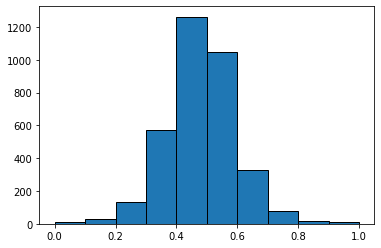

In [27]:
plt.hist(df["subjectivity"], edgecolor = "black")

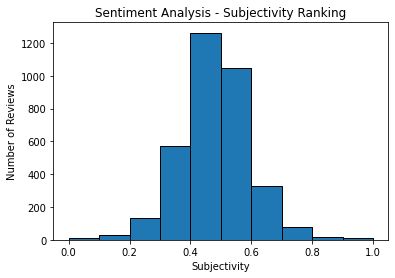

In [28]:
plt.hist(df["subjectivity"], edgecolor = "black")
plt.xlabel("Subjectivity")
plt.ylabel ("Number of Reviews")
plt.title("Sentiment Analysis - Subjectivity Ranking")
plt.savefig("Subjectivity.jpeg")

(array([   4.,   12.,   49.,  200.,  836., 1224.,  783.,  306.,   59.,
          13.]),
 array([-0.76666667, -0.61      , -0.45333333, -0.29666667, -0.14      ,
         0.01666667,  0.17333333,  0.33      ,  0.48666667,  0.64333333,
         0.8       ]),
 <BarContainer object of 10 artists>)

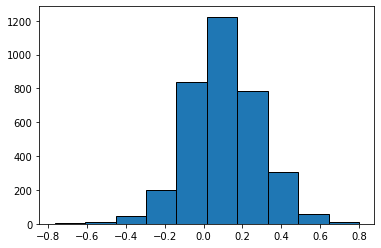

In [29]:
plt.hist(df["polarity"], edgecolor = "black")


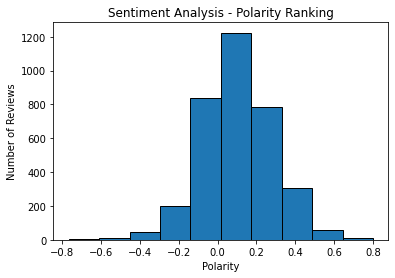

In [30]:
plt.hist(df["polarity"], edgecolor = "black")
plt.xlabel("Polarity")
plt.ylabel ("Number of Reviews")
plt.title("Sentiment Analysis - Polarity Ranking")
plt.savefig("barchart.png", format ="pdf")

array([[<AxesSubplot:title={'center':'polarity'}>]], dtype=object)

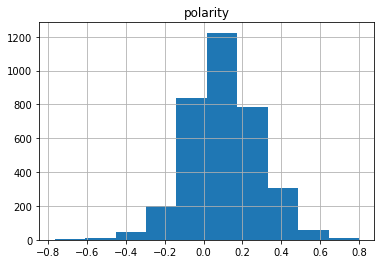

In [31]:
df.hist("polarity")

In [32]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
sia = SentimentIntensityAnalyzer()
def analyze_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [34]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    c = ['green', 'yellow', 'red']
    counts.plot(kind='bar', ax=ax1, color=c)
    percent.plot(kind='bar', ax=ax2, color=c)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

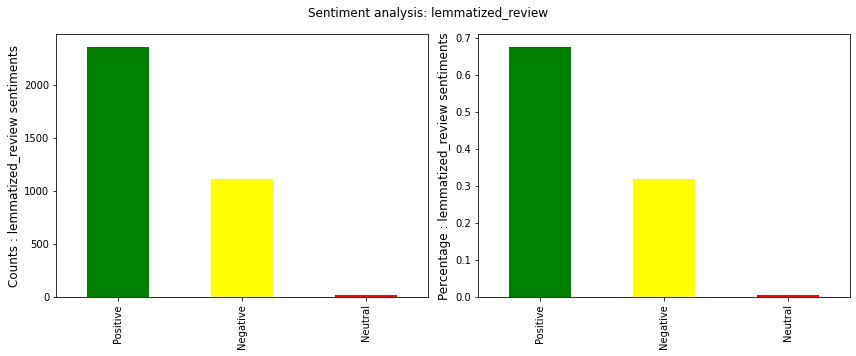

In [36]:
df['text_sentiment'] = df['lemmatized_review'].apply(lambda x: analyze_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'lemmatized_review')